# "Final Project"
> "This repository is created by Nomondari Tuvshinjargal for 9th Week Assignment /NLP/ of Introduction to Data Science COM SCI X 450.1, UCLA Extension Winter 2022."

- toc:true
- branch: master
- badges: true
- comments: true
- author: Hamel Husain & Jeremy Howard
- categories: [fastpages, jupyter]

---

Title: **Business Dynamics in the U.S.**

Student Name: **Nomondari Tuvshinjargal**

Date: **03/14/2022**


## Content
---
### [1. Introduction](#introduction)
* #### [Overview](#overview)
* #### [Research topic and question](#research-topic-and-question)

### [2. Methods, Results ](#methods-results)
* #### [Data Cleaning and Changes](#data-cleaning-changes)
* #### [Exploratory Data Analysis](#exp-analysis)

### [3. Conclusion](#conclusion)

### 1. Introduction
---
- #### Overview

The U.S. has one of the strongest economy in the world. For this reason, I would like to perform some exploratories and analysis on the business field.

The Business Dynamics Statistics (BDS) includes measures of establishment openings and closings, firm startups, job creation and destruction by firm size, age, and industrial sector, and several other statistics on business dynamics. The U.S. economy is comprised of over 6 million establishments with paid employees. The population of these businesses is constantly churning -- some businesses grow, others decline and yet others close. New businesses are constantly replenishing this pool. The BDS series provide annual statistics on gross job gains and losses for the entire economy and by industrial sector, state, and MSA. These data track changes in employment at the establishment level, and thus provide a picture of the dynamics underlying aggregate net employment growth. The reports go from 1978 to 2018. The dataset has 2 categorical variables, 23 numeric variables, and 1927  observations.

The dataset is from the CORGIS Data website. Here is the link to the dataset I have worked on: https://corgis-edu.github.io/corgis/python/business_dynamics/

- #### Research topic and question

I am mostly interested in those questions:

- #### *How does job destruction rate correlate with job creation rate?*

### 2. Methods, Results
- #### Data Cleaning and Changes
 There were not any missing data in the dataset. 
    I added the following 2 categorical variables to the original csv file.
    In the 1970s, there were only two years of 1978 and 1979. So, I deleted the rows of 1970s in the csv file using filter.
    I changed names of all categorical varaibles using substitute function in the csv file /=SUBSTITUTE(D1,"Data.","")/.
    
	1. Region: West, Midwest, Northeast, South /Classified regions by Business Insider Website/
    
    I created new column named "Region" in the csv file and then using filter, I filtered "State" column which relate to the above regions and inserted region names.
    
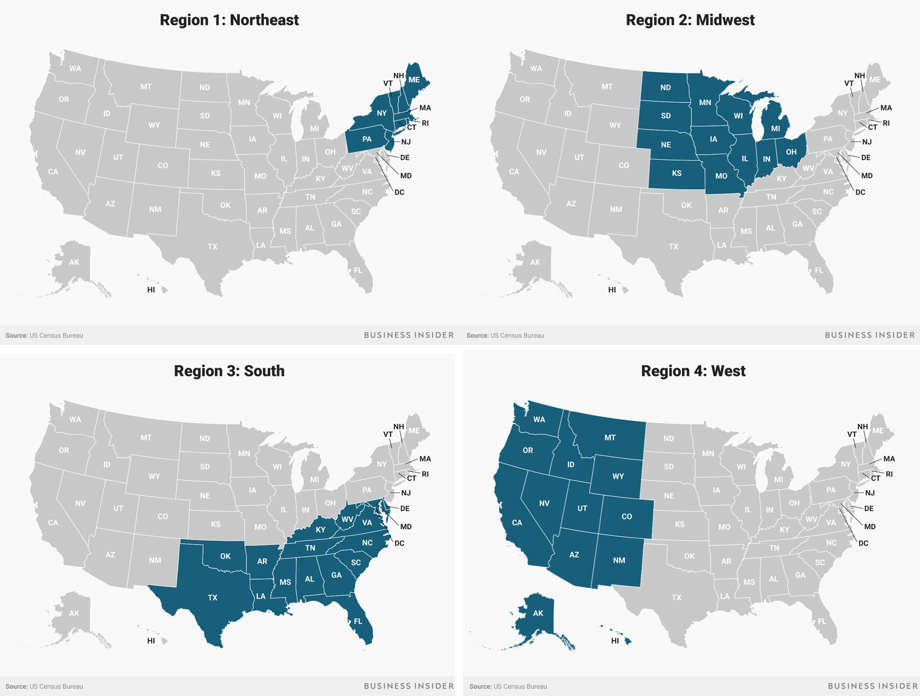
   
    2. Decades: 1980s, 1990s, 2000s, 2010s
    
     I created new column named "Decade" in the csv file and then using filter, I filtered "Year" column by decades and inserted above classified decades.

- #### Exploratory Data Analysis

In [558]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import scale
from scipy.stats import trim_mean
from statsmodels import robust

import matplotlib.pylab as plt
businessdat = pd.read_csv('C:\\Users\\Nomondari\\OneDrive\\Documents\\GitHub\\Final-Project\\business_dynamics.csv')

In [559]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [560]:
businessdat.describe()

,Year,DHS Denominator,Number of Firms,Calculated.Net Job Creation,Calculated.Net Job Creation Rate,Calculated.Reallocation Rate,Establishments.Entered,Establishments.Entered Rate,Establishments.Exited,Establishments.Exited Rate,...,Job Creation.Births,Job Creation.Continuers,Job Creation.Count,Job Creation.Rate,Job Creation.Rate/Births,Job Destruction.Continuers,Job Destruction.Count,Job Destruction.Deaths,Job Destruction.Rate,Job Destruction.Rate/Deaths
count,1833.0,1833.0,1833.0,1833.0,1833.0,1833.0,1833.0,1833.0,1833.0,1833.0,...,1833.0,1833.0,1833.0,1833.0,1833.0,1833.0,1833.0,1833.0,1833.0,1833.0
mean,1999.0,2077199.1,98094.7,31362.1,1.7,27.0,14019.2,11.5,12024.1,9.7,...,115074.3,208256.3,323330.6,15.6,5.6,195203.8,291968.5,96745.3,13.9,4.6
std,11.3,2294404.7,106893.8,84911.1,2.7,4.5,16345.4,2.4,14077.8,1.5,...,135785.1,242255.2,376338.8,3.0,1.6,226207.0,342200.0,117333.3,2.6,1.1
min,1980.0,105361.0,7123.0,-864280.0,-10.4,16.7,1273.0,6.9,975.0,6.5,...,6824.0,13933.0,23079.0,9.5,2.6,11910.0,18634.0,5267.0,8.3,2.1
25%,1989.0,499205.0,28109.0,1952.0,0.3,23.5,3932.0,9.8,3317.0,8.8,...,28157.0,48120.0,76874.0,13.5,4.5,45601.0,68888.0,22419.0,12.1,3.8
50%,1999.0,1313399.0,64939.0,16703.0,1.8,26.8,9027.0,11.2,7644.0,9.6,...,71887.0,131175.0,203140.0,15.3,5.4,121251.0,181951.0,59253.0,13.8,4.5
75%,2009.0,2627327.0,117384.0,51190.0,3.2,29.8,16547.0,13.0,14058.0,10.6,...,137006.0,255250.0,390904.0,17.4,6.6,242196.0,359590.0,115899.0,15.4,5.2
max,2018.0,14858030.0,664454.0,793805.0,14.5,47.3,111144.0,25.0,96943.0,18.9,...,922727.0,1572805.0,2376656.0,32.6,14.2,1786485.0,2710267.0,923782.0,27.3,10.7


In [561]:
businessdat.head()

,State,Year,Decade,Region,DHS Denominator,Number of Firms,Calculated.Net Job Creation,Calculated.Net Job Creation Rate,Calculated.Reallocation Rate,Establishments.Entered,...,Job Creation.Births,Job Creation.Continuers,Job Creation.Count,Job Creation.Rate,Job Creation.Rate/Births,Job Destruction.Continuers,Job Destruction.Count,Job Destruction.Deaths,Job Destruction.Rate,Job Destruction.Rate/Deaths
0,Alabama,1980,1980`s,South,1064141,54838,-7253,-0.7,32.5,8714,...,65734,106998,172732,16.2,6.2,120563,179985,59422,16.9,5.6
1,Alabama,1981,1980`s,South,1051448,54791,-9132,-0.9,31.2,8371,...,70115,93941,164056,15.6,6.7,121251,173188,51937,16.5,4.9
2,Alabama,1982,1980`s,South,1037728,53219,-9658,-0.9,33.1,8185,...,73083,98887,171970,16.6,7.0,119658,181628,61970,17.5,6.0
3,Alabama,1983,1980`s,South,1012807,53724,-8506,-0.8,33.9,8371,...,66389,105308,171697,17.0,6.6,122786,180203,57417,17.8,5.7
4,Alabama,1984,1980`s,South,1054020,57267,99075,9.4,23.0,10726,...,79566,140801,220367,20.9,7.5,82043,121292,39249,11.5,3.7


In [562]:
businessdat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833 entries, 0 to 1832
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   State                              1833 non-null   object 
 1   Year                               1833 non-null   int64  
 2   Decade                             1833 non-null   object 
 3   Region                             1833 non-null   object 
 4   DHS Denominator                    1833 non-null   int64  
 5   Number of Firms                    1833 non-null   int64  
 6   Calculated.Net Job Creation        1833 non-null   int64  
 7   Calculated.Net Job Creation Rate   1833 non-null   float64
 8   Calculated.Reallocation Rate       1833 non-null   float64
 9   Establishments.Entered             1833 non-null   int64  
 10  Establishments.Entered Rate        1833 non-null   float64
 11  Establishments.Exited              1833 non-null   int64

Changing the "Year" variable from number to categorical variable:

In [563]:
businessdat['Year'] = businessdat['Year'].astype(str)

In [564]:
businessdat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833 entries, 0 to 1832
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   State                              1833 non-null   object 
 1   Year                               1833 non-null   object 
 2   Decade                             1833 non-null   object 
 3   Region                             1833 non-null   object 
 4   DHS Denominator                    1833 non-null   int64  
 5   Number of Firms                    1833 non-null   int64  
 6   Calculated.Net Job Creation        1833 non-null   int64  
 7   Calculated.Net Job Creation Rate   1833 non-null   float64
 8   Calculated.Reallocation Rate       1833 non-null   float64
 9   Establishments.Entered             1833 non-null   int64  
 10  Establishments.Entered Rate        1833 non-null   float64
 11  Establishments.Exited              1833 non-null   int64

In [565]:
businessdat.shape

(1833, 27)

In [566]:
businessdat.sample(10)

,State,Year,Decade,Region,DHS Denominator,Number of Firms,Calculated.Net Job Creation,Calculated.Net Job Creation Rate,Calculated.Reallocation Rate,Establishments.Entered,...,Job Creation.Births,Job Creation.Continuers,Job Creation.Count,Job Creation.Rate,Job Creation.Rate/Births,Job Destruction.Continuers,Job Destruction.Count,Job Destruction.Deaths,Job Destruction.Rate,Job Destruction.Rate/Deaths
671,Maryland,1988,1980`s,South,1076805,57939,47872,4.4,28.6,9250,...,81553,120038,201591,18.7,7.6,95517,153719,58202,14.3,5.4
1775,Wisconsin,2000,2000`s,Midwest,249233,16774,9322,3.7,23.1,1819,...,12683,25417,38100,15.3,5.1,19181,28778,9597,11.5,3.9
1432,Rhode Island,2008,2000`s,Northeast,1309379,65920,23225,1.8,26.9,8572,...,67276,131790,199066,15.2,5.1,121040,175841,54801,13.4,4.2
1092,New Mexico,1980,1980`s,West,331602,16129,14099,4.3,34.8,3384,...,32241,39571,71812,21.7,9.7,38915,57713,18798,17.4,5.7
729,Massachusetts,2007,2000`s,Northeast,1610304,74811,50745,3.2,29.0,11778,...,92137,191897,284034,17.6,5.7,166499,233289,66790,14.5,4.1
1801,Wyoming,1987,1980`s,West,2045474,97490,104688,5.1,29.9,18050,...,165824,245158,410982,20.1,8.1,198219,306294,108075,15.0,5.3
464,Indiana,2015,2010`s,Midwest,521103,22745,5716,1.1,19.4,2462,...,17195,38981,56176,10.8,3.3,34551,50460,15909,9.7,3.1
24,Alabama,2004,2000`s,South,1613771,71716,39087,2.4,26.2,9487,...,82394,168467,250861,15.5,5.1,141043,211774,70731,13.1,4.4
121,California,1984,1980`s,West,596798,39236,50429,8.4,23.4,7062,...,42634,77662,120296,20.2,7.1,44003,69867,25864,11.7,4.3
249,District of Columbia,1995,1990`s,West,1382327,69774,22943,1.7,25.6,8653,...,76178,123571,199749,14.4,5.5,120918,176806,55888,12.8,4.0


There are not any missing variables in the csv file.

In [567]:
businessdat.isna()

,State,Year,Decade,Region,DHS Denominator,Number of Firms,Calculated.Net Job Creation,Calculated.Net Job Creation Rate,Calculated.Reallocation Rate,Establishments.Entered,...,Job Creation.Births,Job Creation.Continuers,Job Creation.Count,Job Creation.Rate,Job Creation.Rate/Births,Job Destruction.Continuers,Job Destruction.Count,Job Destruction.Deaths,Job Destruction.Rate,Job Destruction.Rate/Deaths
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1828,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1829,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1830,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [568]:
businessdat.isna().sum()

State                                0
Year                                 0
Decade                               0
Region                               0
DHS Denominator                      0
Number of Firms                      0
Calculated.Net Job Creation          0
Calculated.Net Job Creation Rate     0
Calculated.Reallocation Rate         0
Establishments.Entered               0
Establishments.Entered Rate          0
Establishments.Exited                0
Establishments.Exited Rate           0
Establishments.Physical Locations    0
Firm Exits.Count                     0
Firm Exits.Establishment Exit        0
Firm Exits.Employments               0
Job Creation.Births                  0
Job Creation.Continuers              0
Job Creation.Count                   0
Job Creation.Rate                    0
Job Creation.Rate/Births             0
Job Destruction.Continuers           0
Job Destruction.Count                0
Job Destruction.Deaths               0
Job Destruction.Rate     

In [569]:
# Calculate mean of variables
businessdat.mean()

C:\Users\Nomondari\AppData\Local\Temp/ipykernel_18340/1331729806.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  businessdat.mean()


Year                                      inf
DHS Denominator                     2077199.1
Number of Firms                       98094.7
Calculated.Net Job Creation           31362.1
Calculated.Net Job Creation Rate          1.7
Calculated.Reallocation Rate             27.0
Establishments.Entered                14019.2
Establishments.Entered Rate              11.5
Establishments.Exited                 12024.1
Establishments.Exited Rate                9.7
Establishments.Physical Locations    122196.5
Firm Exits.Count                       8005.5
Firm Exits.Establishment Exit          8193.9
Firm Exits.Employments                49591.9
Job Creation.Births                  115074.3
Job Creation.Continuers              208256.3
Job Creation.Count                   323330.6
Job Creation.Rate                        15.6
Job Creation.Rate/Births                  5.6
Job Destruction.Continuers           195203.8
Job Destruction.Count                291968.5
Job Destruction.Deaths            

In [570]:
# Calculate the median
businessdat.median()

C:\Users\Nomondari\AppData\Local\Temp/ipykernel_18340/1586912408.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  businessdat.median()


Year                                   1999.0
DHS Denominator                     1313399.0
Number of Firms                       64939.0
Calculated.Net Job Creation           16703.0
Calculated.Net Job Creation Rate          1.8
Calculated.Reallocation Rate             26.8
Establishments.Entered                 9027.0
Establishments.Entered Rate              11.2
Establishments.Exited                  7644.0
Establishments.Exited Rate                9.6
Establishments.Physical Locations     81632.0
Firm Exits.Count                       5145.0
Firm Exits.Establishment Exit          5243.0
Firm Exits.Employments                30763.0
Job Creation.Births                   71887.0
Job Creation.Continuers              131175.0
Job Creation.Count                   203140.0
Job Creation.Rate                        15.3
Job Creation.Rate/Births                  5.4
Job Destruction.Continuers           121251.0
Job Destruction.Count                181951.0
Job Destruction.Deaths            

Wyoming has the highest Net Job Creation Rate of 14.5 in 2018. 

In [571]:
# Find the maximum amount
businessdat.max()

State                                 Wyoming
Year                                     2018
Decade                                 2010`s
Region                                   West
DHS Denominator                      14858030
Number of Firms                        664454
Calculated.Net Job Creation            793805
Calculated.Net Job Creation Rate         14.5
Calculated.Reallocation Rate             47.3
Establishments.Entered                 111144
Establishments.Entered Rate              25.0
Establishments.Exited                   96943
Establishments.Exited Rate               18.9
Establishments.Physical Locations      836870
Firm Exits.Count                        63112
Firm Exits.Establishment Exit           64550
Firm Exits.Employments                 483486
Job Creation.Births                    922727
Job Creation.Continuers               1572805
Job Creation.Count                    2376656
Job Creation.Rate                        32.6
Job Creation.Rate/Births          

Alabama has the lowest Net Job Creation Rate of 10.4 in 1980. 

In [572]:
# Find the minimum amount
businessdat.min()

State                                Alabama
Year                                    1980
Decade                                1980`s
Region                               Midwest
DHS Denominator                       105361
Number of Firms                         7123
Calculated.Net Job Creation          -864280
Calculated.Net Job Creation Rate       -10.4
Calculated.Reallocation Rate            16.7
Establishments.Entered                  1273
Establishments.Entered Rate              6.9
Establishments.Exited                    975
Establishments.Exited Rate               6.5
Establishments.Physical Locations       8447
Firm Exits.Count                         635
Firm Exits.Establishment Exit            642
Firm Exits.Employments                  2990
Job Creation.Births                     6824
Job Creation.Continuers                13933
Job Creation.Count                     23079
Job Creation.Rate                        9.5
Job Creation.Rate/Births                 2.6
Job Destru

In [573]:
# Calculate the variance
businessdat.var()

C:\Users\Nomondari\AppData\Local\Temp/ipykernel_18340/704215597.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  businessdat.var()


DHS Denominator                     5264292881596.9
Number of Firms                       11426292891.1
Calculated.Net Job Creation            7209902283.0
Calculated.Net Job Creation Rate                7.4
Calculated.Reallocation Rate                   20.5
Establishments.Entered                  267171300.2
Establishments.Entered Rate                     5.7
Establishments.Exited                   198183854.2
Establishments.Exited Rate                      2.1
Establishments.Physical Locations     17752925541.0
Firm Exits.Count                         88871887.6
Firm Exits.Establishment Exit            93238664.8
Firm Exits.Employments                 3733336684.4
Job Creation.Births                   18437593559.2
Job Creation.Continuers               58687576879.2
Job Creation.Count                   141630908920.4
Job Creation.Rate                               8.7
Job Creation.Rate/Births                        2.5
Job Destruction.Continuers            51169615575.5
Job Destruct

In [574]:
# Calculate the standard deviation
businessdat.std()

C:\Users\Nomondari\AppData\Local\Temp/ipykernel_18340/2505958189.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  businessdat.std()


DHS Denominator                     2294404.7
Number of Firms                      106893.8
Calculated.Net Job Creation           84911.1
Calculated.Net Job Creation Rate          2.7
Calculated.Reallocation Rate              4.5
Establishments.Entered                16345.4
Establishments.Entered Rate               2.4
Establishments.Exited                 14077.8
Establishments.Exited Rate                1.5
Establishments.Physical Locations    133240.1
Firm Exits.Count                       9427.2
Firm Exits.Establishment Exit          9656.0
Firm Exits.Employments                61101.0
Job Creation.Births                  135785.1
Job Creation.Continuers              242255.2
Job Creation.Count                   376338.8
Job Creation.Rate                         3.0
Job Creation.Rate/Births                  1.6
Job Destruction.Continuers           226207.0
Job Destruction.Count                342200.0
Job Destruction.Deaths               117333.3
Job Destruction.Rate              

#### Correlation:
From the below chart, variables of Establishments.Physical Locations and DHS.Dominator are highly correlated with number of 0.994556.

Also, variables of Establishments.Entered and Establishments.Exited	are highly correlated with number of 0.983930.
Moreover, variables of Establishments.Entered and Job Creation.Count are highly correlated with number of 0.986447.

Correlation between variables ofjJob creation rate and job destruction rate is 0.524152.

In [575]:
businessdat.corr().style.background_gradient(cmap="YlOrBr")

,DHS Denominator,Number of Firms,Calculated.Net Job Creation,Calculated.Net Job Creation Rate,Calculated.Reallocation Rate,Establishments.Entered,Establishments.Entered Rate,Establishments.Exited,Establishments.Exited Rate,Establishments.Physical Locations,Firm Exits.Count,Firm Exits.Establishment Exit,Firm Exits.Employments,Job Creation.Births,Job Creation.Continuers,Job Creation.Count,Job Creation.Rate,Job Creation.Rate/Births,Job Destruction.Continuers,Job Destruction.Count,Job Destruction.Deaths,Job Destruction.Rate,Job Destruction.Rate/Deaths
DHS Denominator,1.000000,0.989720,0.398384,-0.050987,0.041260,0.958239,-0.018082,0.970824,0.076460,0.994556,0.963850,0.964574,0.954445,0.951184,0.981542,0.975026,-0.007417,-0.044644,0.973550,0.973445,0.962252,0.045198,0.074206
Number of Firms,0.989720,1.000000,0.413471,-0.032673,0.083379,0.979958,0.034689,0.986473,0.120959,0.998394,0.984573,0.984651,0.967969,0.961743,0.982012,0.979139,0.039084,0.002877,0.971776,0.974225,0.967949,0.079065,0.114284
Calculated.Net Job Creation,0.398384,0.413471,1.000000,0.573793,0.010546,0.468963,0.233136,0.354571,-0.088689,0.411136,0.372023,0.372356,0.352003,0.471939,0.506981,0.496630,0.330590,0.192594,0.271188,0.298042,0.346506,-0.226185,-0.030319
Calculated.Net Job Creation Rate,-0.050987,-0.032673,0.573793,1.000000,-0.043132,0.025699,0.436416,-0.062790,-0.171283,-0.037828,-0.046748,-0.046858,-0.051773,0.028485,0.035821,0.033336,0.587744,0.397418,-0.126616,-0.105715,-0.063710,-0.380937,-0.078658
Calculated.Reallocation Rate,0.041260,0.083379,0.010546,-0.043132,1.000000,0.177007,0.713219,0.144670,0.729418,0.069344,0.152204,0.152404,0.189270,0.208827,0.118475,0.151610,0.732909,0.779015,0.148311,0.164118,0.192319,0.882991,0.849630
Establishments.Entered,0.958239,0.979958,0.468963,0.025699,0.177007,1.000000,0.161327,0.983930,0.201266,0.976896,0.986593,0.986671,0.979073,0.986828,0.979305,0.986447,0.156607,0.121670,0.960698,0.968492,0.972576,0.151929,0.200058
Establishments.Entered Rate,-0.018082,0.034689,0.233136,0.436416,0.713219,0.161327,1.000000,0.081739,0.627052,0.018286,0.103321,0.102045,0.117983,0.164265,0.074914,0.107491,0.896252,0.883162,0.042365,0.060366,0.094112,0.564879,0.636127
Establishments.Exited,0.970824,0.986473,0.354571,-0.062790,0.144670,0.983930,0.081739,1.000000,0.217436,0.985546,0.997019,0.997270,0.984903,0.968292,0.970180,0.973885,0.078198,0.054477,0.977601,0.983062,0.982486,0.155467,0.189861
Establishments.Exited Rate,0.076460,0.120959,-0.088689,-0.171283,0.729418,0.201266,0.627052,0.217436,1.000000,0.109573,0.224470,0.223536,0.227223,0.202530,0.119230,0.149824,0.538190,0.624112,0.172603,0.186778,0.211958,0.795355,0.793157
Establishments.Physical Locations,0.994556,0.998394,0.411136,-0.037828,0.069344,0.976896,0.018286,0.985546,0.109573,1.000000,0.981642,0.981991,0.966913,0.961112,0.983678,0.979984,0.024658,-0.011280,0.973686,0.975733,0.968666,0.068003,0.102996


In [1]:
businessdat.groupby('Region')['Job Creation.Rate'].describe()

NameError: name 'businessdat' is not defined

Northeast has the lowest mean /13.6/ and minimum amount /8.3/ in job destruction rate.

On the other hand, West has the highest mean /14.3/, minimum amount /9.2/ in job destruction rate. 

But Northeast has the highest maximum amount of 27.6 in job destruction rate. 

In [577]:
businessdat.groupby('Region')['Job Destruction.Rate'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Midwest,429.0,13.7,2.4,8.6,11.9,13.6,15.0,24.4
Northeast,312.0,13.6,2.6,8.3,11.8,13.3,15.0,27.3
South,585.0,13.9,2.5,8.4,12.0,13.8,15.4,25.5
West,507.0,14.3,2.7,9.2,12.4,14.1,15.9,26.3


We can see that job destruction rates were decreased during the decades.

In 1980s, the mean was 18.2 and in 2010s, the mean was 12.6. Even the maximum amount was decreased from 32.6 to 17.2. /1980s, 2010s/

In [578]:
businessdat.groupby('Decade')['Job Destruction.Rate'].describe()

,count,mean,std,min,25%,50%,75%,max
Decade,,,,,,,,
1980`s,470.0,15.5,2.6,10.0,13.7,15.2,16.9,27.3
1990`s,470.0,14.2,1.8,10.0,12.9,14.0,15.2,20.8
2000`s,470.0,14.4,2.2,10.0,13.0,14.1,15.6,22.9
2010`s,423.0,11.3,1.4,8.3,10.3,11.1,12.0,18.2


In [579]:
businessdat['high job creation rates'] = businessdat['Job Creation.Rate'] > businessdat['Job Creation.Rate'].mean()

In [580]:
businessdat.groupby('high job creation rates')['Job Creation.Rate'].describe()

,count,mean,std,min,25%,50%,75%,max
high job creation rates,,,,,,,,
False,995.0,13.4,1.4,9.5,12.3,13.7,14.6,15.6
True,838.0,18.1,2.1,15.6,16.5,17.7,19.3,32.6


In [581]:
businessdat['Job Creation.Rate'].describe()

count   1833.0
mean      15.6
std        3.0
min        9.5
25%       13.5
50%       15.3
75%       17.4
max       32.6
Name: Job Creation.Rate, dtype: float64

We can see that job creation rates which is higher than average has many outliers till 32,6.

<AxesSubplot:title={'center':'Job Creation.Rate'}, xlabel='high job creation rates'>

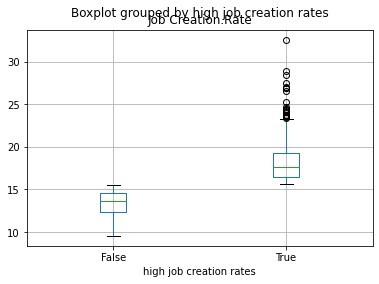

In [582]:
businessdat.boxplot(column=['Job Creation.Rate'], by='high job creation rates')

Remove outliers by using IQR technique

In [583]:
def outliers(businessdat, feature):
    Q1= businessdat[feature].quantile(0.25)
    Q3 = businessdat[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(businessdat, "Job Creation.Rate")

print("Upper: ", upper)
print("Lower: ", lower)

Upper:  23.444500000000005
Lower:  7.4564999999999975


Look on outliers:
There are 19 rows outliers with 7 states, all of them in 1980s, most of them belong to West region.

In [584]:
businessdat[(businessdat['Job Creation.Rate'] < lower) | (businessdat['Job Creation.Rate'] > upper)]

,State,Year,Decade,Region,DHS Denominator,Number of Firms,Calculated.Net Job Creation,Calculated.Net Job Creation Rate,Calculated.Reallocation Rate,Establishments.Entered,...,Job Creation.Continuers,Job Creation.Count,Job Creation.Rate,Job Creation.Rate/Births,Job Destruction.Continuers,Job Destruction.Count,Job Destruction.Deaths,Job Destruction.Rate,Job Destruction.Rate/Deaths,high job creation rates
40,Alaska,1981,1980`s,West,109264,7477,12326,11.3,35.1,1597,...,20276,31523,28.9,10.3,11910,19197,7287,17.6,6.7,True
41,Alaska,1982,1980`s,West,123553,8073,14568,11.8,41.6,1992,...,24720,40244,32.6,12.6,17529,25676,8147,20.8,6.6,True
42,Alaska,1983,1980`s,West,131831,9181,7658,5.8,45.3,2520,...,20974,37503,28.4,12.5,20575,29845,9270,22.6,7.0,True
43,Alaska,1984,1980`s,West,139620,10256,10546,7.6,38.6,2614,...,21429,37492,26.9,11.5,17977,26946,8969,19.3,6.4,True
44,Alaska,1985,1980`s,West,145820,10566,10056,6.9,41.2,2434,...,24661,40077,27.5,10.6,18115,30021,11906,20.6,8.2,True
45,Alaska,1986,1980`s,West,146531,10460,-2093,-1.4,47.3,2260,...,19520,34666,23.7,10.3,25515,36759,11244,25.1,7.7,True
49,Alaska,1990,1990`s,West,151759,10621,14759,9.7,28.0,1918,...,24671,35968,23.7,7.4,13451,21209,7758,14.0,5.1,True
82,Arkansas,1984,1980`s,South,906336,53001,118149,13.0,27.0,11384,...,147682,240307,26.5,10.2,78140,122158,44018,13.5,4.9,True
83,Arkansas,1985,1980`s,South,1011777,56026,113115,11.2,31.8,12067,...,169328,273832,27.1,10.3,98706,160717,62011,15.9,6.1,True
84,Arkansas,1986,1980`s,South,1089120,57692,69183,6.4,35.9,12234,...,151632,264535,24.3,10.4,134194,195352,61158,17.9,5.6,True


In [585]:
businessdat.groupby('Region')['Job Creation.Rate'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Midwest,429.0,15.0,2.7,9.8,13.1,14.8,16.9,25.2
Northeast,312.0,15.1,2.6,9.9,13.1,15.1,16.9,23.1
South,585.0,15.6,2.9,9.5,13.5,15.4,17.4,27.1
West,507.0,16.4,3.3,9.6,14.1,15.9,18.4,32.6


Job creation rates in regions are close to each other, especially the minimum is between 9.5 and 9.8.

West region has the highest mean with the amount of 16.4 and outliers with the amount of 32.6. 

<AxesSubplot:title={'center':'Job Creation.Rate'}, xlabel='Region'>

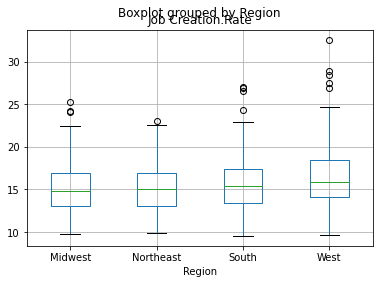

In [586]:
businessdat.boxplot(column=['Job Creation.Rate'], by='Region')

Plotting histograms

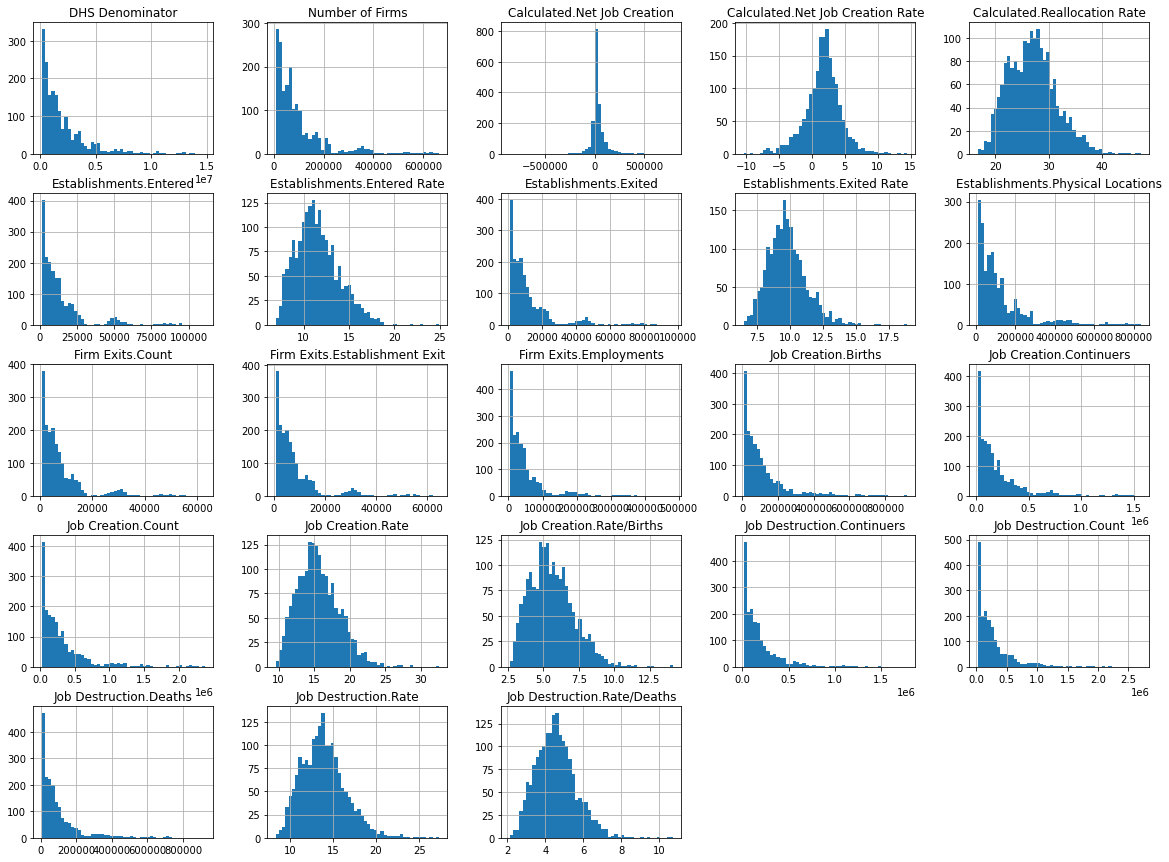

In [587]:
businessdat.hist(bins=50,figsize=(20,15))
plt.show()

Barplot by counted Regions in Job Creation Rate:

Northeast has the lowest count of 300. In contrast, South has the highest counts of almost 600 which doubles the counts of Northeast.

<AxesSubplot:xlabel='Region'>

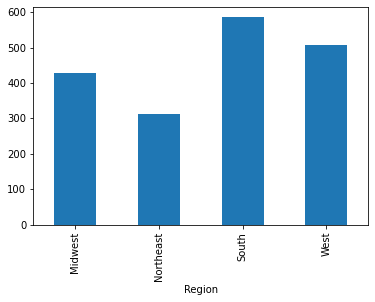

In [588]:
businessdat.groupby('Region')['Job Creation.Rate'].count().plot(kind='bar')

Plotting histogram of Rates in Job Creation and Job Destruction

Green colored histograms are the Job Creation rates and the purple histograms are the Job Destruction rates.
Bins range from 8 to 14, frequency of the Job Destruction rates are higher while bins range from 14 to 28, frequency of the Job Creation rates are higher

Text(0.5, 1.0, 'Job Creation Rate VS Job Destruction Rate')

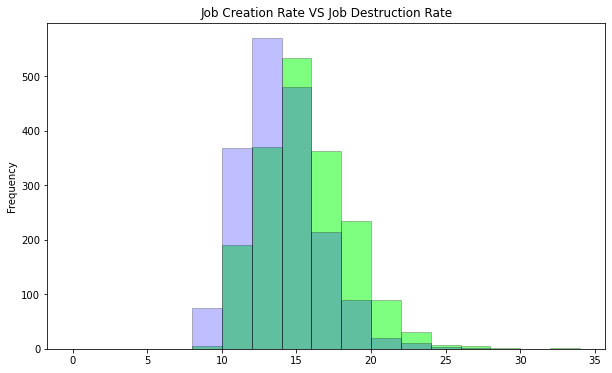

In [589]:
edgecolor = 0,0,0,0.25
ax = (businessdat['Job Creation.Rate']).plot.hist(figsize=(10, 6),color = (0,1,0,0.5), edgecolor = edgecolor
                                                , bins=range(0,35,2))
ax = (businessdat['Job Destruction.Rate']).plot.hist(figsize=(10, 6),color = (0,0,1,0.25), edgecolor = edgecolor
                                                , bins=range(0,35,2))
plt.title('Job Creation Rate VS Job Destruction Rate')

**Scatterplot of Job Destruction.Rate and Job Creation.Rate**

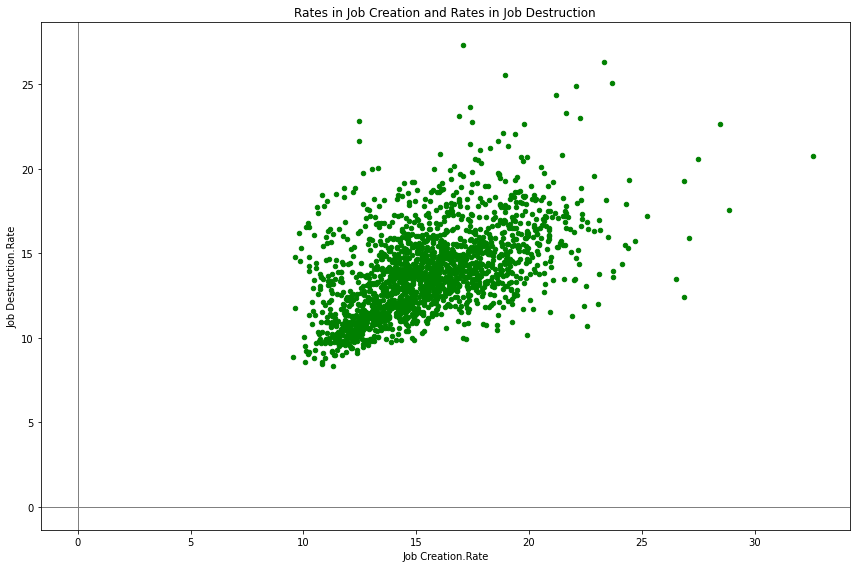

In [590]:
ax = businessdat.plot.scatter(x = 'Job Creation.Rate', y= 'Job Destruction.Rate',
                           color ="green",  figsize=(12, 8))
ax.set_xlabel('Job Creation.Rate')
ax.set_ylabel('Job Destruction.Rate')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.title('Rates in Job Creation and Rates in Job Destruction')
plt.tight_layout()
plt.show()

From the below scatterplot, except the west region, regions cluttered between 10 and 20 in job creation rate. West region is cluttered between 10 and 25.

Job destruction rates cluttered between 7.5 and 17.5 mostly in all 4 regions. 

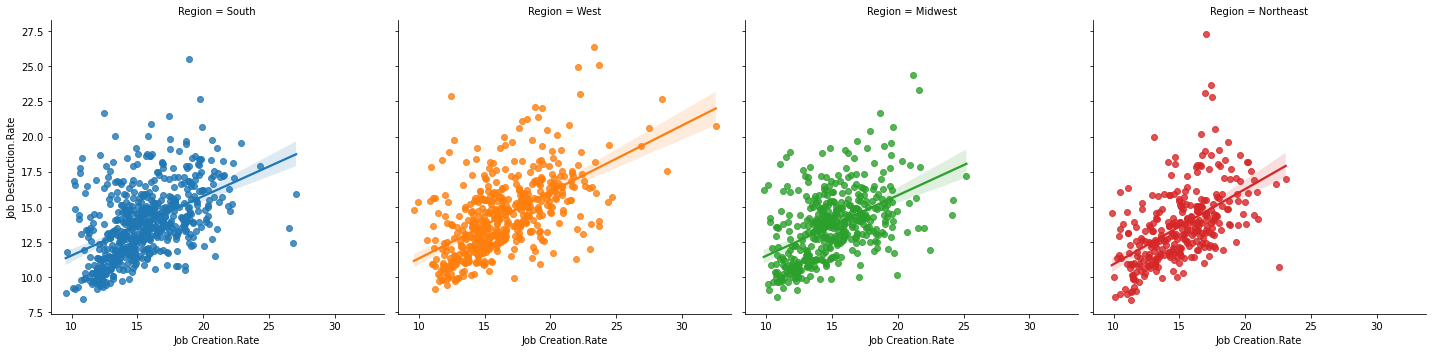

In [591]:
import seaborn as sns
sns.lmplot(data=businessdat, x="Job Creation.Rate", y="Job Destruction.Rate",
           col="Region", hue="Region");

But scatterplots in Decades show different results compared to the above scatterplots.

Job destruction and job creation rates were scarced and scattered between 12.5 and 30, between 10 and 27.5 respectively in the first decade of 1980s. Also, this decade has the highest rates of job destruction and job creation. 

But this trend became cluttered between 12.5 and 25 /Job creation rate/, between 10 and 20 /Job destruction  rate/ in the next decade.

In the 2000s, the job creation rate decreased slighly, ranges between 10 and 20. Job destruction rates increased slightly, ranges between 10 and 22.5.

Lastly, in the late 2010s, the trend became narrow; ranges from 7.5 and 17.5. Both job creation and job destruction rates decreased. 

From these scatterplot, we can summarize that there are correlations between job creation rates and job destruction rates.

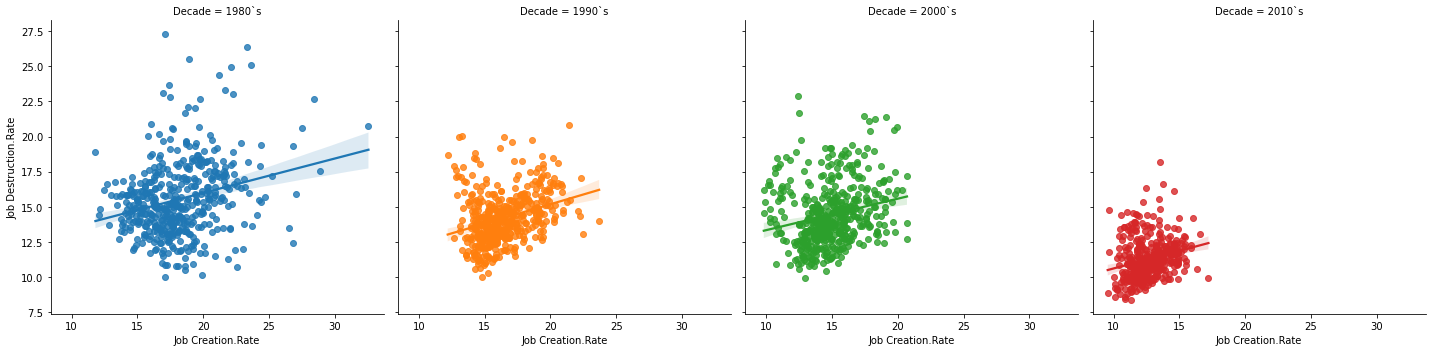

In [592]:
import seaborn as sns
sns.lmplot(data=businessdat, x="Job Creation.Rate", y="Job Destruction.Rate",
           col="Decade", hue="Decade");

**Linear Regression between Job Creation Rate and Job Destruction Rate**

Job Destruction Rate as a dependent variable; job creation rate as an independent variable.

Linear Regression Model: Job Destruction Rate = 15.515686 + 1.52541 * Job Creation Rate

Job Creation Rate = 1% >> Job Destruction Rate = 15.515686 + 1.52541 * 1 = 17.041096
Job Creation Rate = 2% >> Job Destruction Rate = 15.515686 + 1.52541 * 2 = 18.566506

When Job Creation Rate increases by 1%, Job Destruction Rate increases by 1.52541%. There are positive correlations between two variables.

In [593]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [594]:
X = businessdat[['Job Destruction.Rate']]
y = businessdat['Job Creation.Rate']

In [595]:
X.head()

,Job Destruction.Rate
0,16.9
1,16.5
2,17.5
3,17.8
4,11.5


In [596]:
y.head()

0   16.2
1   15.6
2   16.6
3   17.0
4   20.9
Name: Job Creation.Rate, dtype: float64

In [597]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.2)

In [598]:
scaler = StandardScaler()

In [599]:
X_train = scaler.fit_transform(X_train)

In [600]:
X_test = scaler.transform(X_test)

In [601]:
linear_regression = LinearRegression()
model = linear_regression.fit(X_train, y_train)

In [602]:
y_pred = model.predict(X_test)

In [603]:
businessdat = pd.DataFrame({'test': y_test, 'predicted': y_pred})

In [606]:
businessdat.sample(100)

,test,predicted
411,16.6,17.0
846,13.4,15.0
1128,13.7,13.8
848,10.6,15.7
849,10.9,14.4
...,...,...
1716,18.7,19.0
788,19.5,16.4
363,19.4,18.1
1184,15.3,16.0


There are few outliers in the scatterplot. 

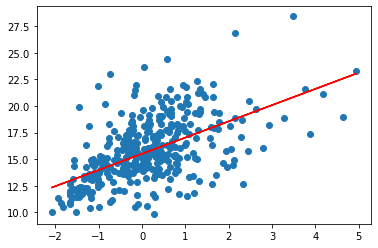

In [607]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

R square is 0.28785 which is far from 1. From the above plots, also, we can see the points located little bit far from the regression line.

In [608]:
score = linear_regression.score(X_train, y_train)
r2score = r2_score(y_test, y_pred)
stddevscore = np.sqrt(mean_squared_error(y_test, y_pred))

print('Training Score: {}'.format(score))
print('Testing score R2: {}'.format(r2score))
print('Testing score StdDev: {}'.format(stddevscore))

Training Score: 0.26887714725520184
Testing score R2: 0.28785778462005707
Testing score StdDev: 2.5200679830599104


In [609]:
r2score = r2_score(y_test, y_pred)
msescore = mean_squared_error(y_test, y_pred)

In [610]:
theta_0 = linear_regression.coef_
theta_0

array([1.52541594])

In [611]:
intercept = linear_regression.intercept_
intercept

15.515686903137793

Actual has high difference than prediction has.

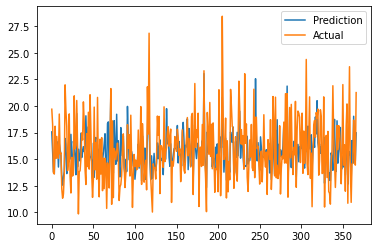

In [612]:
plt.plot(y_pred, label="Prediction")
plt.plot(y_test.values, label="Actual")
plt.legend()

**2. What about correaltions between Job Destruction Rate and Job Creation Rate in California?** 

In the decades between 1980s and 2000s, there are negative correlations between those two variables.
I deleted all the rows exceps the California states row in the csv file.

In [613]:
cadat = pd.read_csv('C:\\Users\\Nomondari\\OneDrive\\Documents\\GitHub\\Final-Project\\business_dynamics_CA.csv')

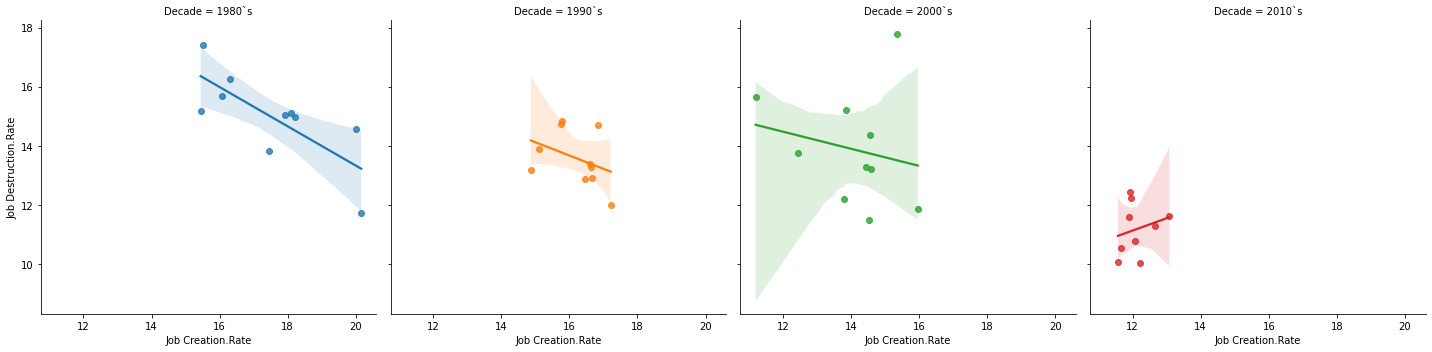

In [614]:
import seaborn as sns
sns.lmplot(data=cadat, x="Job Creation.Rate", y="Job Destruction.Rate",
           col="Decade", hue="Decade");

### 3. Result
Looking at a big picture, Job Destruction Rate and Job Creation Rate are not highly correlated.

It is clearly seen from R square /0.31/, regression model and scatterplot, and regression model and scatterplot of random state as interpreted each plot and analysis.